## building raster readers, tight boundary extractors and density checks

In [30]:
import fiona
from shapely import geometry, wkt
from shapely.geometry import shape
from shapely.ops import transform

import rasterio
from rasterio import features

import json
import geojson

from functools import partial
import pyproj
import utm

import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
inputgeotiff="/mnt/bigdata/frontierSI/sampledata/raster/grid10_1m.tiff"

In [81]:
dataset = rasterio.open(inputgeotiff)

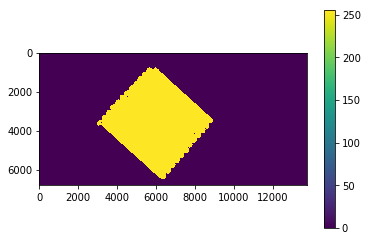

In [82]:
plt.imshow(dataset.dataset_mask())
plt.colorbar()

In [83]:
dataset.transform

Affine(1.0, 0.0, 520161.5,
       0.0, -1.0, 5653924.5)

In [84]:
dataset.dataset_mask()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [85]:
listofpolygons = []

In [86]:
boundaries = features.shapes(dataset.dataset_mask(), transform=dataset.transform)

In [87]:
for bound in boundaries:
    listofpolygons.append(bound)

In [103]:
import numpy as np

i=0
for polygon in listofpolygons:
    print(json.dumps(polygon[0]))

{"type": "Polygon", "coordinates": [[[526169.5, 5653148.5], [526169.5, 5653147.5], [526170.5, 5653147.5], [526170.5, 5653148.5], [526169.5, 5653148.5]]]}
{"type": "Polygon", "coordinates": [[[526168.5, 5653147.5], [526168.5, 5653146.5], [526169.5, 5653146.5], [526169.5, 5653147.5], [526168.5, 5653147.5]]]}
{"type": "Polygon", "coordinates": [[[526169.5, 5653145.5], [526169.5, 5653144.5], [526170.5, 5653144.5], [526170.5, 5653145.5], [526169.5, 5653145.5]]]}
{"type": "Polygon", "coordinates": [[[525860.5, 5653144.5], [525860.5, 5653138.5], [525862.5, 5653138.5], [525862.5, 5653144.5], [525860.5, 5653144.5]]]}
{"type": "Polygon", "coordinates": [[[525836.5, 5653140.5], [525836.5, 5653139.5], [525837.5, 5653139.5], [525837.5, 5653138.5], [525838.5, 5653138.5], [525838.5, 5653140.5], [525836.5, 5653140.5]]]}
{"type": "Polygon", "coordinates": [[[525875.5, 5653141.5], [525875.5, 5653138.5], [525874.5, 5653138.5], [525874.5, 5653137.5], [525875.5, 5653137.5], [525875.5, 5653136.5], [525876.5

{"type": "Polygon", "coordinates": [[[520161.5, 5653924.5], [520161.5, 5647124.5], [533941.5, 5647124.5], [533941.5, 5653924.5], [520161.5, 5653924.5]], [[526521.5, 5647424.5], [526521.5, 5647423.5], [526522.5, 5647423.5], [526523.5, 5647423.5], [526523.5, 5647425.5], [526522.5, 5647425.5], [526522.5, 5647424.5], [526521.5, 5647424.5]], [[526165.5, 5653162.5], [526165.5, 5653161.5], [526164.5, 5653161.5], [526162.5, 5653161.5], [526162.5, 5653160.5], [526161.5, 5653160.5], [526161.5, 5653159.5], [526160.5, 5653159.5], [526160.5, 5653158.5], [526159.5, 5653158.5], [526159.5, 5653157.5], [526158.5, 5653157.5], [526158.5, 5653156.5], [526157.5, 5653156.5], [526156.5, 5653156.5], [526156.5, 5653155.5], [526155.5, 5653155.5], [526155.5, 5653154.5], [526154.5, 5653154.5], [526154.5, 5653153.5], [526153.5, 5653153.5], [526153.5, 5653152.5], [526152.5, 5653152.5], [526152.5, 5653151.5], [526151.5, 5653151.5], [526151.5, 5653150.5], [526150.5, 5653150.5], [526150.5, 5653149.5], [526149.5, 56531

In [76]:
listofpolygons[-2][0]

{'type': 'Polygon',
 'coordinates': [[(494634.5, 5626866.5),
   (494634.5, 5626862.5),
   (494633.5, 5626862.5),
   (494632.5, 5626862.5),
   (494632.5, 5626861.5),
   (494631.5, 5626861.5),
   (494631.5, 5626864.5),
   (494627.5, 5626864.5),
   (494627.5, 5626863.5),
   (494626.5, 5626863.5),
   (494625.5, 5626863.5),
   (494625.5, 5626860.5),
   (494624.5, 5626860.5),
   (494624.5, 5626861.5),
   (494621.5, 5626861.5),
   (494621.5, 5626856.5),
   (494620.5, 5626856.5),
   (494620.5, 5626859.5),
   (494618.5, 5626859.5),
   (494618.5, 5626857.5),
   (494616.5, 5626857.5),
   (494616.5, 5626859.5),
   (494615.5, 5626859.5),
   (494615.5, 5626862.5),
   (494614.5, 5626862.5),
   (494614.5, 5626863.5),
   (494615.5, 5626863.5),
   (494615.5, 5626864.5),
   (494613.5, 5626864.5),
   (494613.5, 5626856.5),
   (494612.5, 5626856.5),
   (494612.5, 5626857.5),
   (494611.5, 5626857.5),
   (494611.5, 5626858.5),
   (494609.5, 5626858.5),
   (494609.5, 5626855.5),
   (494608.5, 5626855.5),
   

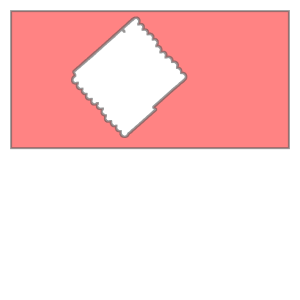

In [46]:
thebound

In [75]:
dataset.close()